# Importations

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn import svm, naive_bayes
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC , SVR
from sklearn.metrics import r2_score
from mod.wine_regression import *

## Directory

In [49]:
INPUT_DIR = "/Users/louis/cours_v_guigue/game-learning/data/winequality_data.csv"

# Analyse et pre-processing des données

In [50]:
data = pd.read_csv(INPUT_DIR)

## Analyse descriptive

In [51]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Il n'y a aucune valeur nulle ou manquante dans notre jeu de données.

In [55]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
data.shape

(1599, 12)

In [57]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Analyse approfondie

### Histogrammes et boxplots

Pour vérifier l'existence de valeurs abérrantes, nous allons tracer les histogrammes et boxplots associés à chaque colonne de notre dataframe:

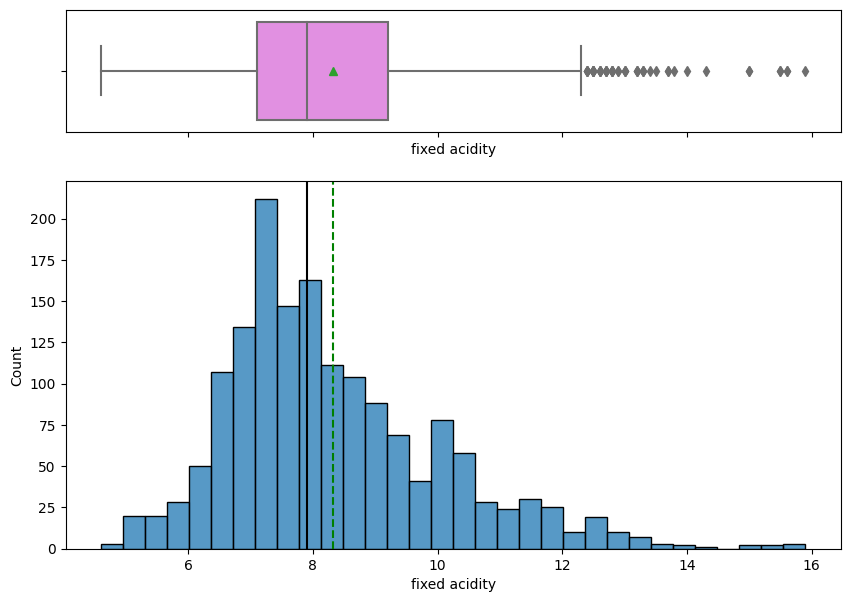

In [58]:
# Pour fixed acidity
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="fixed acidity", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="fixed acidity", ax=ax2)

ax2.axvline(data["fixed acidity"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["fixed acidity"].median(), color="black", linestyle="-") #Médiane

Dans ce cas-là, la commande 'data.describe()' ne laissait pas penser à une présence de valeurs aberrantes, et l'histogramme ci-dessus semble le confirmer.

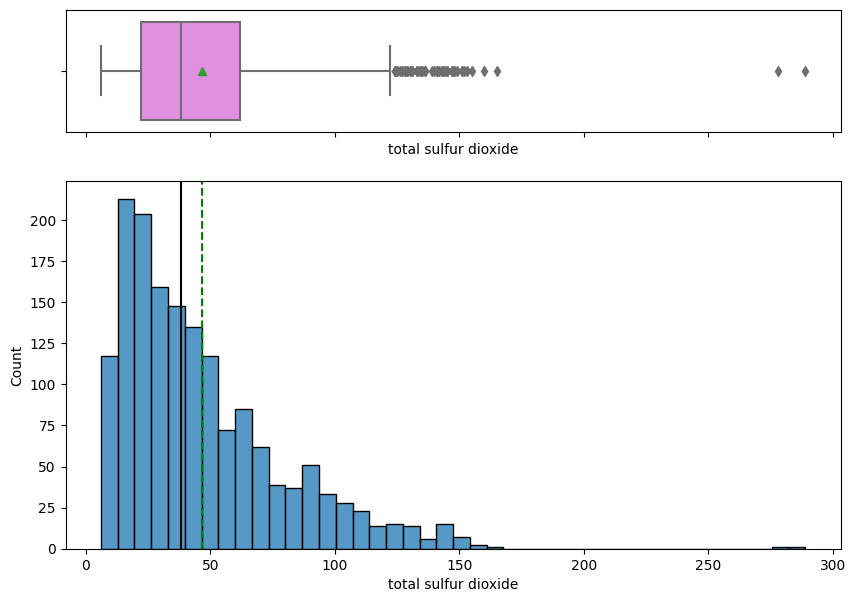

In [59]:
# Pour total sulfur dioxide
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="total sulfur dioxide", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="total sulfur dioxide", ax=ax2)

ax2.axvline(data["total sulfur dioxide"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["total sulfur dioxide"].median(), color="black", linestyle="-") #Médiane

Il y a effectivement des valeurs aberrantes pour la colonne total sulfur dioxide.

In [60]:
index_to_drop = data.loc[data['total sulfur dioxide'] > 200].index
data = data.drop(index_to_drop)
data.shape

(1597, 12)

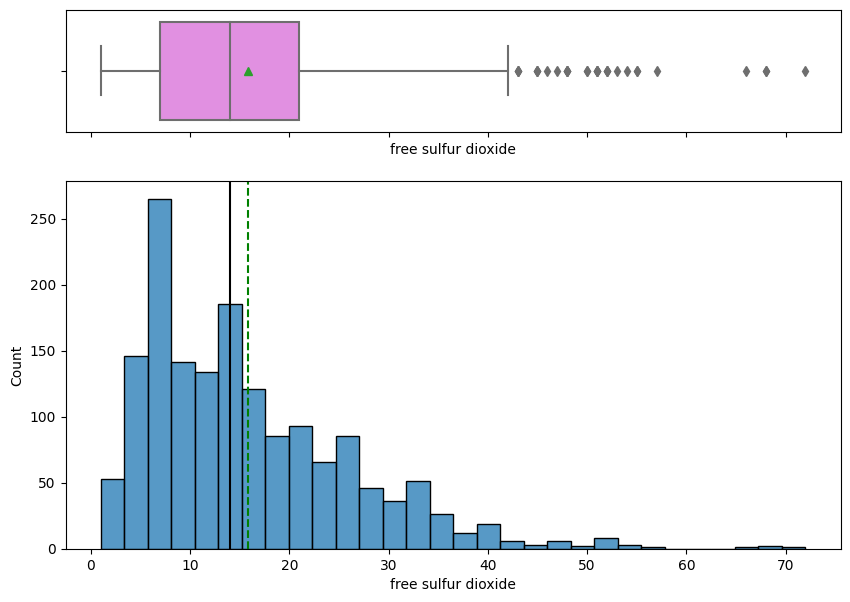

In [61]:
# Pour free sulfur dioxide
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="free sulfur dioxide", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="free sulfur dioxide", ax=ax2)

ax2.axvline(data["free sulfur dioxide"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["free sulfur dioxide"].median(), color="black", linestyle="-") #Médiane

Encore une fois, on se rend compte qu'il y a quelques valeurs que nous pouvons considérer comme étant aberrantes:

In [62]:
index_to_drop = data.loc[data['free sulfur dioxide'] > 60].index
data = data.drop(index_to_drop)
data.shape

(1593, 12)

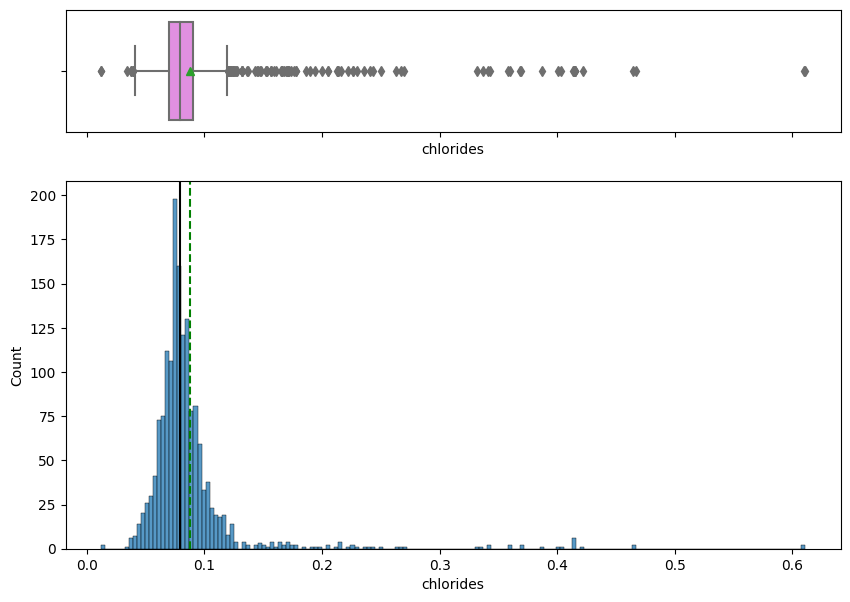

In [63]:
# Pour chlorides
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="chlorides", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="chlorides", ax=ax2)

ax2.axvline(data["chlorides"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["chlorides"].median(), color="black", linestyle="-") #Médiane

La colonne "chlorides" était également un bon candidat à la présence de valeurs aberrantes, et on retrouve en effet beaucoup de résidus sur l'histogramme ci-dessus.

In [64]:
index_to_drop = data.loc[data['chlorides'] > 0.3].index
data = data.drop(index_to_drop)
data.shape

(1571, 12)

### Mutual info score

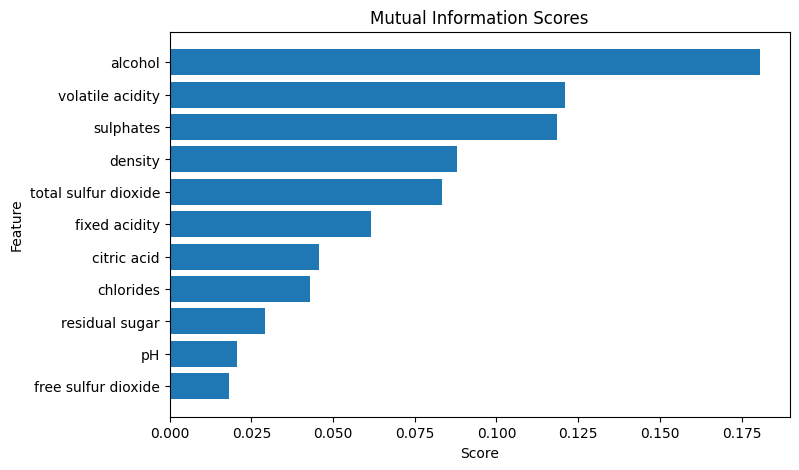

In [65]:
mi_scores = mutual_info_scores(data.loc[:, data.columns!="quality"], data["quality"])

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

Nous pouvons voir sur le graphique ci-dessus que l'alcool explique majoritairement la qualité du vin.

Nous remarquons au contraire plusieurs caractéristiques (citrid acid, chlorides, residual sugar, free sulfur dioxide et pH) dont le score d'information mutuelle est inférieur à 0.05. Nous allons donc nous affranchir de ces informations qui semblent moins significatives pour la prédiction.

In [66]:
data = data.drop(["free sulfur dioxide","residual sugar","pH","citrid acid","chlorides"], axis = 1)
data.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,34.0,0.9978,0.56,9.4,5


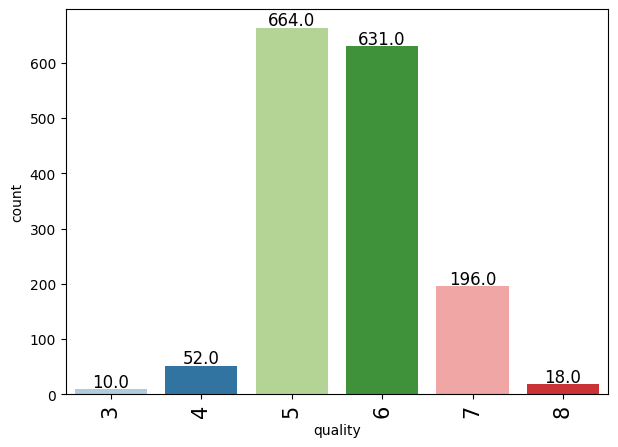

In [67]:
labeled_barplot(data, "quality")

Nous voyons que notre répartition de données suit une gaussienne avec des classes centrales plus représentées que les classes des extremités

In [68]:
X = data.loc[:, data.columns!="quality"]
y = data["quality"]
X.shape, y.shape

((1571, 6), (1571,))

# APPRENTISSAGE DES MODELES DE REGRESSION

## 1er Modèle de regression: regression linéaire

### Modèle simple sans prétraitement

In [69]:
data_sp = pd.read_csv(INPUT_DIR)

In [70]:
X_sp = data_sp.loc[:, data_sp.columns!="quality"]
y_sp = data_sp["quality"]
X_sp.shape, y_sp.shape

((1599, 11), (1599,))

In [71]:
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_sp, y_sp, test_size=0.2, random_state=42)

In [72]:
print(f'Training data:\n{X_train_sp[0:5]}\nTest data:\n{X_test_sp[0:5]}')

Training data:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493            8.7             0.690         0.31             3.0      0.086   
354            6.1             0.210         0.40             1.4      0.066   
342           10.9             0.390         0.47             1.8      0.118   
834            8.8             0.685         0.26             1.6      0.088   
705            8.4             1.035         0.15             6.0      0.073   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
493                 23.0                  81.0  1.00020  3.48       0.74   
354                 40.5                 165.0  0.99120  3.25       0.59   
342                  6.0                  14.0  0.99820  3.30       0.75   
834                 16.0                  23.0  0.99694  3.32       0.47   
705                 11.0                  54.0  0.99900  3.37       0.49   

     alcohol  
493     11.6  
354     11.9  
34

In [73]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm_sp = LinearRegression()
scores_sp = cross_val_score(mod_non_norm_sp, X_train_sp, y_train_sp, cv=10)
print("Score sans normalisation des données :", scores_sp.mean())

Score sans normalisation des données : 0.3230213163533245


In [74]:
# Entraîner un modèle de régression linéaire avec normalisation des données
scaler = MinMaxScaler()
X_train_norm_sp = scaler.fit_transform(X_train_sp)

mod_norm_sp = LinearRegression()
scores_norm_sp = cross_val_score(mod_norm_sp, X_train_norm_sp, y_train_sp, cv=10)
print("Score avec normalisation des données :", scores_norm_sp.mean())


Score avec normalisation des données : 0.323021316353324


### Observation
On remarque que la normalisation n'a qu'un impact marginal sur le r2_score de notre modèle --> Nous ne normaliserons plus à l'avenir.

### Avec le prétraitement

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
665              0.590         0.14                  48.0  0.99810       0.56   
1338             0.500         0.00                  26.0  0.99448       0.45   
1540             0.520         0.08                  32.0  0.99646       0.63   
393              0.665         0.61                  95.0  0.99700       0.54   
1109             0.470         0.43                  66.0  0.99820       0.76   

      alcohol  
665       9.7  
1338      9.5  
1540     11.6  
393       9.1  
1109     10.8  
Test data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
1218             0.400         0.31                  24.0  0.99600       0.69   
641              0.590         0.44                  68.0  0.99920       0.63   
959              0.590         0.05                  32.0  0.99735       0.61   
1334             0.835         0.00                  11.0  0.99608 

In [77]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm = LinearRegression()
scores = cross_val_score(mod_non_norm, X_train, y_train, cv=10)
print("Score sans normalisation des données :", scores.mean())

Score sans normalisation des données : 0.3507751461318937


In [78]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
665              0.590         0.14                  48.0  0.99810       0.56   
1338             0.500         0.00                  26.0  0.99448       0.45   
1540             0.520         0.08                  32.0  0.99646       0.63   
393              0.665         0.61                  95.0  0.99700       0.54   
1109             0.470         0.43                  66.0  0.99820       0.76   

      alcohol  
665       9.7  
1338      9.5  
1540     11.6  
393       9.1  
1109     10.8  
Test data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
1218             0.400         0.31                  24.0  0.99600       0.69   
641              0.590         0.44                  68.0  0.99920       0.63   
959              0.590         0.05                  32.0  0.99735       0.61   
1334             0.835         0.00                  11.0  0.99608 

In [79]:
y_train = y_train.astype('float32').to_numpy().astype(np.float32)
y_test= y_test.astype('float32').to_numpy().astype(np.float32)

In [80]:
mod = LinearRegression()
scores = cross_val_score(mod_norm, X_train, y_train, cv=10)
print("Score avec normalisation des données :", scores.mean())

Score avec normalisation des données : 0.35077514704865187


In [81]:
mod.fit(X_train, y_train)
print("dans la formule de la regression on le coefficient directeur :", mod.coef_)
print("et l'ordonnée :" ,mod.intercept_)

dans la formule de la regression on le coefficient directeur : [-1.16023273e+00  7.09750638e-03 -2.87990370e-03 -1.09095711e+01
  8.79425196e-01  2.82183745e-01]
et l'ordonnée : 13.747260219779644


In [82]:
y_pred = mod.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.2840696011995657


### Observation 

- avoir supprimer certaines colonnes nous a permis un meilleur r2_score en train et en test. On  grade uniquement les colonnes gardées lors du prétraitement de données pour le modèle lineaire mais nous garderons la meme démarche pour les autres modèles
- Notre modèle possède un score moins bon en ensemble de test qu'en ensemble de train ce qui est logique. 

## 2ème modèle : REGRESSION SVR

In [98]:
#avec prétraitemnt
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Le R² avec prétaitement est de:", round((r2),5))

#sans prétraitement
svr = SVR()
svr.fit(X_train_sp, y_train_sp)
y_pred = svr.predict(X_test_sp)
r2 = r2_score(y_test_sp, y_pred)
print("Le R² sans prétaitement est de:", round((r2),5))

Le R² avec prétaitement est de: 0.09755
Le R² sans prétaitement est de: 0.18516


### Ajustement des hyperparamètres

In [90]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.2,1.5],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma' :[0.1,0.8,1,1.1,1.4]
}
#SVM_GridSearchCV = GridSearchCV(svr, param_grid=param, scoring='neg_mean_squared_error', cv=5)
#SVM_GridSearchCV.fit(X_train_norm,y_train_norm)
#SVM_GridSearchCV.best_params_

### Test des hyper-parametres

In [97]:
#avec prétraitement
svr = SVR(C=1.5,gamma =1.4, kernel="rbf")
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Le R² avec prétraitement est de:", round((r2),5))

#sans prétraitemtn
svr = SVR(C=1.5,gamma =1.4, kernel="rbf")
svr.fit(X_train_sp, y_train_sp)
y_pred = svr.predict(X_test_sp)
r2 = r2_score(y_test_sp, y_pred)
print("Le R² sans prétraitement est de:", round((r2),5))

Le R² avec prétraitement est de: 0.15441
Le R² sans prétraitement est de: 0.24358


### Observations 
    
 - Les résultats de score sont assez décevants pour le modèle de SVR, nous pouvons tout de meme noter que la recherche et l'ajustement des hyper-paramètres permettent une amélioration des performances du système.
 - Etrangement,  Dans le cas du modèle de SVR le prétraitement des données a diminué le score de notre modèle. 

     On essaie un autre modèle de régression

## 3ème REGRESSION : RANDOM FOREST

In [103]:
#avec prétraitement
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Le R² avec prétraitement est de:", r2)

# sans prétraitement 
rf = RandomForestRegressor()
rf.fit(X_train_sp, y_train_sp)
y_pred = rf.predict(X_test_sp)
r2 = r2_score(y_test_sp, y_pred)
print("Le R² sans prétraitement est de:", r2)

R²: 0.3473847608618731
R²: 0.5191909024342862


### Ajustement des hyper-paramètres

In [100]:
param = {
              'n_estimators': [50, 100, 150,200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
            }
#SVM_GridSearchCV = GridSearchCV(rf, param_grid=param, scoring='r2', cv=40)
#SVM_GridSearchCV.fit(X_train_norm,y_train_norm)
#SVM_GridSearchCV.best_params_

# output
#{'max_depth': 15,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'n_estimators': 150}

### Test des valeurs des hyper-paramètres 

In [104]:
#avec prétraitement
rf = RandomForestRegressor( max_depth =  15 ,min_samples_split= 2, n_estimators=  150, min_samples_leaf= 1 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Le R² avec prétraitement est de:", r2)

# sans prétraitement 
rf = RandomForestRegressor(max_depth =  15 ,min_samples_split= 2, n_estimators=  150, min_samples_leaf= 1)
rf.fit(X_train_sp, y_train_sp)
y_pred = rf.predict(X_test_sp)
r2 = r2_score(y_test_sp, y_pred)
print("Le R² sans prétraitement est de:", r2)

R²: 0.36553856432534926
R²: 0.5197802254548495


### Observations  

- Notre modèle Random Forest a les meilleurs résultats sur l'ensemble de test et semble etre le bon modèle pour notre regression. 
- L'ajustement des hyper-paramètres améliore le R² de notre modèle avec prétraitement mais pas celui sans. De plus c'est le modèle sans prétraitement qui obtient le meilleur résultat de tous nos modèles.
- Tout de meme, le R² du modèle Random forest, du modèle SVM et de la régréssion linéaire, on peut conclure à des résultats assez décevant des modèles pour faire une regression des données.  


    Avec ces résultats décevants, on voudrait maintenant tester plusieurs modèles en classification mutliclasse pour voir si l'étiquette de nos données se prette mieux à ce genre de prédiction.

# Classification multiclasse

## 1er modèle : SVM

In [108]:
#avec prétraitement 
SVM = SVC(random_state=1)
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_test)
score = round(accuracy_score(y_test,predictions),5)
print("Le score d'accurary de notre SVM avec prétraitement {}".format(score))

# sans prétraitement
SVM = SVC(random_state=1)
SVM.fit(X_train_sp,y_train_sp)
predictions = SVM.predict(X_test_sp)
score = round(accuracy_score(y_test_sp,predictions),5)
print("Le score d'accurary de notre SVM sans prétraitement {}".format(score))

Le score d'accurary de notre SVM avec prétraitement 0.48254
Le score d'accurary de notre SVM sans prétraitement 0.50938


### Ajustement des hyper-paramètres

In [ ]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.5,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
#SVM_GridSearchCV = GridSearchCV(SVM, param_grid=param, scoring='accuracy', cv=40)
#SVM_GridSearchCV.fit(X_train_classif,y_train_classif)
#SVM_GridSearchCV.best_params_

### Test des valeurs des hyper-paramètres 

In [111]:
#avec prétraitement
SVM_BestGridSearchCV1 = SVC(C = 1.5, gamma = 1.3, kernel = 'rbf')
SVM_BestGridSearchCV1.fit(X_train,y_train)
predictions = SVM_BestGridSearchCV1.predict(X_test)
score = round(accuracy_score(y_test,predictions),5)
print("Le score d'accurary de notre SVM avec prétraitement {}".format(score))

# sans prétraitement
SVM = SVC(C = 1.5, gamma = 1.3, kernel = 'rbf')
SVM_BestGridSearchCV1.fit(X_train_sp,y_train_sp)
predictions = SVM_BestGridSearchCV1.predict(X_test_sp)
score = round(accuracy_score(y_test_sp,predictions),5)
print("Le score d'accurary de notre SVM sans prétraitement {}".format(score))


Le score d'accurary de notre SVM avec prétraitement 0.52063
Le score d'accurary de notre SVM sans prétraitement 0.53125


## RANDOM FOREST

In [113]:
#avec prétaitement
rf_classif= RandomForestClassifier()
rf_classif.fit(X_train,y_train)
predictions = rf_classif.predict(X_test)
score = round(accuracy_score(y_test,predictions),5)
print("Le score d'accurary de notre Random Forest avec prétraitement {}".format(score))

#sans prétaitement
rf_classif= RandomForestClassifier()
rf_classif.fit(X_train_sp,y_train_sp)
predictions = rf_classif.predict(X_test_sp)
score = round(accuracy_score(y_test_sp,predictions),5)
print("Le score d'accurary de notre Random Forest sans prétraitement {}".format(score))

Le score d'accurary de notre Random Forest avec prétraitement 0.6254
Le score d'accurary de notre Random Forest sans prétraitement 0.65625


### Ajustement des hyper-paramètres

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
              'n_estimators': [50, 100, 150,200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]
}
#SVM_GridSearchCV = GridSearchCV(rf_classif, param_grid=param, scoring='accuracy', cv=40)
#SVM_GridSearchCV.fit(X_train_classif,y_train_classif)
#SVM_GridSearchCV.best_params_

### Test des valeurs des hyper-paramètres 

In [115]:
#avec prétaitement
rf_classif= RandomForestClassifier( max_depth =  15 ,min_samples_split= 5, n_estimators=  200)
rf_classif.fit(X_train,y_train)
predictions = rf_classif.predict(X_test)
score = round(accuracy_score(y_test,predictions),5)
print("Le score d'accurary de notre Random Forest avec prétraitement {}".format(score))

#sans prétaitement
rf_classif= RandomForestClassifier(max_depth =  15 ,min_samples_split= 5, n_estimators=  200)
rf_classif.fit(X_train_sp,y_train_sp)
predictions = rf_classif.predict(X_test_sp)
score = round(accuracy_score(y_test_sp,predictions),5)
print("Le score d'accurary de notre Random Forest sans prétraitement {}".format(score))

Le score d'accurary de notre Random Forest avec prétraitement 0.62222
Le score d'accurary de notre Random Forest sans prétraitement 0.65625


### Observations
- Notre modèle de Random Forest en classification est encore une fois le meilleur modèle des classifications, ce qui en fait notre modèle car, effectivement, nos modèles de classification multiclasse a un meilleur score. 
- Notre modèle Random Forest Classification ne semble pas impacté par l'ajustement des hyper-paramètres. 

# CONCLUSION
- Notre jeu de données se prétait plus à la classification
- Nous avons eu des résultats surprenants concernant l'utilisation du prétraitement et la normalisation des données. 
- Notre modèle Random Forest a été le meilleur modèle dans les deux cas, regression et classification. 